# Explore Exercises

Answer the questions below by using a combination of the techniques discussed in the lesson that you think is appropriate.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pyspark.sql
from pyspark.sql.functions import *

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_data

In [2]:
df = wrangle_data()

In [3]:
df.show(1, vertical = True)

-RECORD 0------------------------------------
 source_id            | svcCRMLS             
 dept_division        | Field Operations     
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 SLA_due_date         | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 request_address      | 2315  el paso st,... 
 council_district     | 5                    
 num_weeks_late       | -142.6441088         
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
 department           | Animal Care Services 
 dept_subject_to_SLA  | true                 
 source_username      | svcCRMLS  

## 1. How many different cases are there, by department?

Text(0.5, 0, 'Number of unique cases')

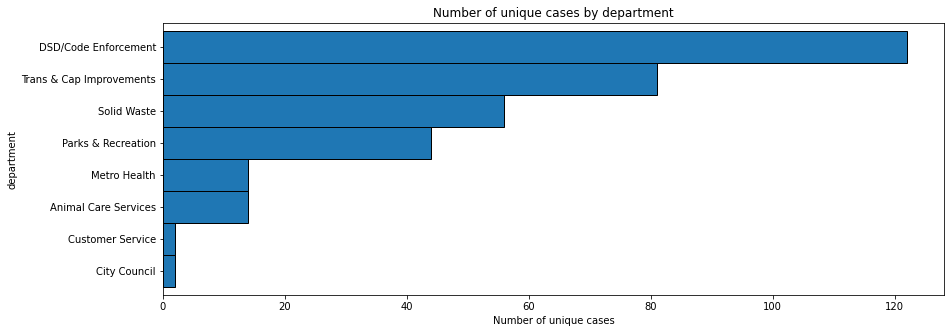

In [25]:
(
    df.groupBy("department", "service_request_type")
    .count()
    .toPandas()
    .groupby("department")
    .service_request_type
    .count()
    .sort_values()
    .plot.barh(width=1, edgecolor="black", figsize=(14,5))
    
)

plt.title("Number of unique cases by department")
plt.xlabel("Number of unique cases")

## 2. Does the percentage of cases that are late vary by department?

Text(0, 0.5, '% cases late')

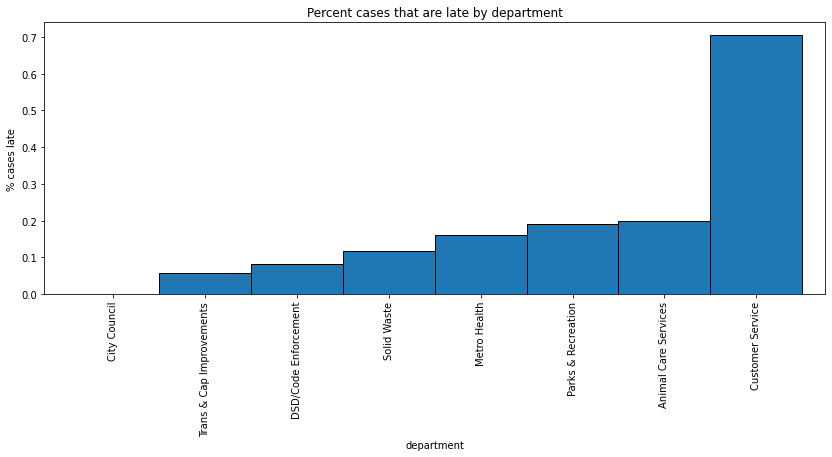

In [38]:
(
    df.select("department", "case_late")
    .toPandas()
    .groupby("department")
    .case_late
    .mean()
    .sort_values()
    .plot.bar(width=1, edgecolor="black", figsize=(14, 5))

)

plt.title("Percent cases that are late by department")
plt.ylabel("% cases late")

## 3. On average, how late are the late cases by department?

Text(0, 0.5, 'Number of Days')

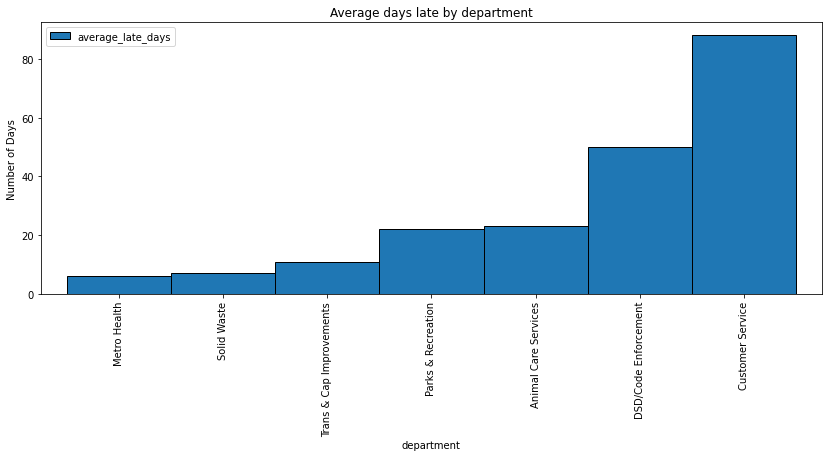

In [54]:
(
    df.filter(df.case_late == "true")
    .groupBy("department")
    .agg(round(mean("num_days_late"), 0).alias("average_late_days"))
    .toPandas()
    .sort_values(by="average_late_days")
    .set_index("department")
    .plot.bar(width=1, edgecolor="black", figsize=(14, 5))
)

plt.title("Average days late by department")
plt.ylabel("Number of Days")

## 4. What is the service type that is the most late? Just for Parks & Rec?

In [60]:
df.show(1, vertical=True)

-RECORD 0------------------------------------
 source_id            | svcCRMLS             
 dept_division        | Field Operations     
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 SLA_due_date         | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 request_address      | 2315  el paso st,... 
 council_district     | 5                    
 num_weeks_late       | -142.6441088         
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
 department           | Animal Care Services 
 dept_subject_to_SLA  | true                 
 source_username      | svcCRMLS  

Text(0.5, 0, 'Type of Request')

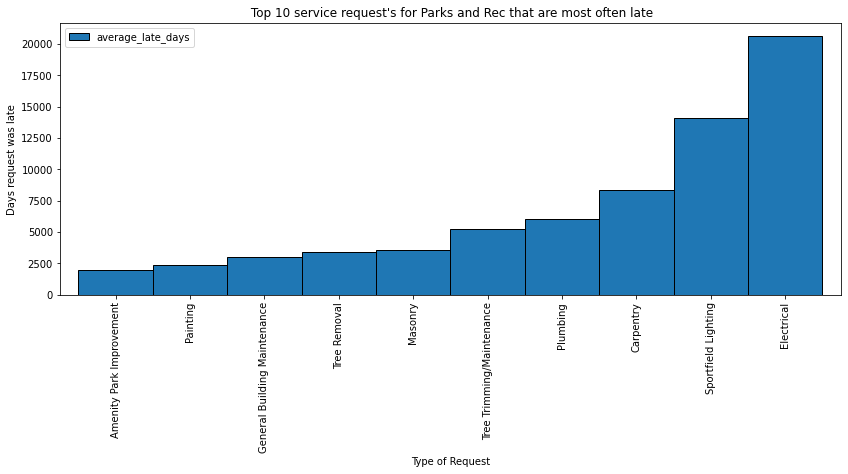

In [73]:
(
    df.filter(df.department == "Parks & Recreation")
    .filter(df.case_late == "true")
    .groupby("service_request_type")
    .agg(round(sum("num_days_late"), 0).alias("average_late_days"))
    .sort("average_late_days")
    .toPandas()
    .set_index("service_request_type")
    .tail(10)
    .plot.bar(width=1, edgecolor="black", figsize=(14, 5))


)

plt.title(" Top 10 service request's for Parks and Rec that are most often late")
plt.ylabel("Days request was late")
plt.xlabel("Type of Request")

## 5. For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.

In [76]:
department_list = (
    df.select(df.department)
    .toPandas()
    .department
    .unique()
)

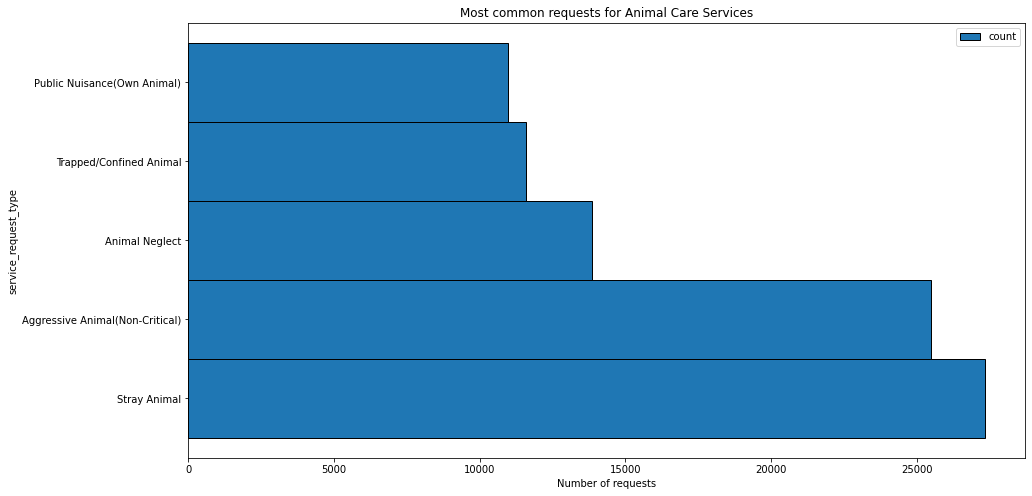

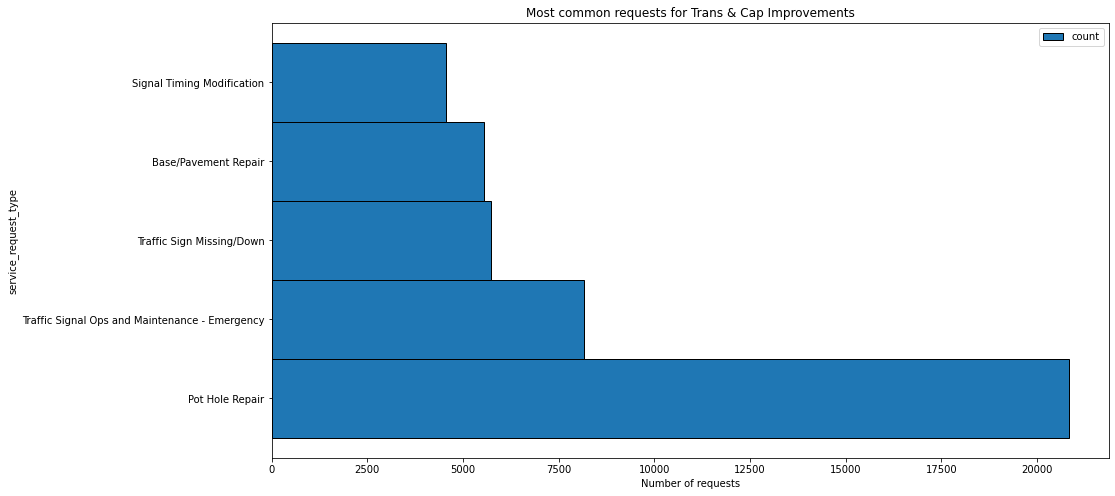

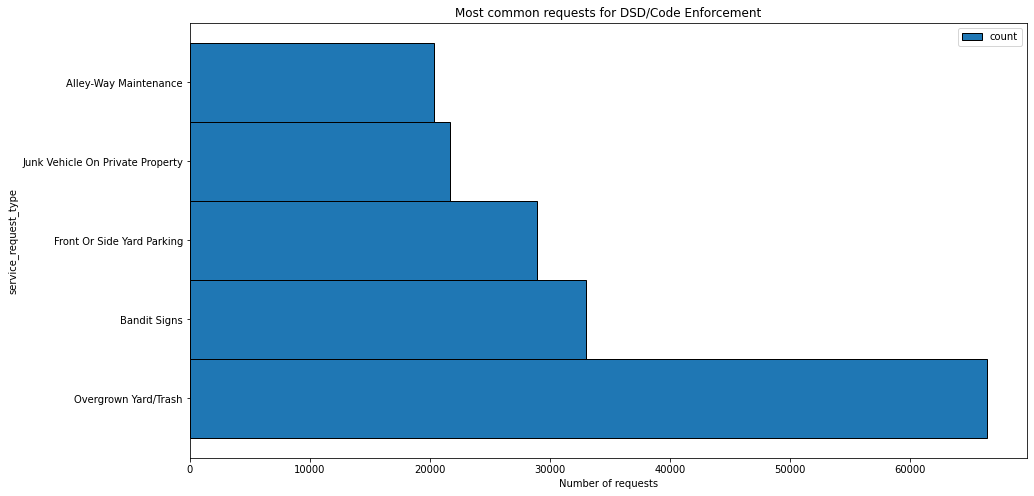

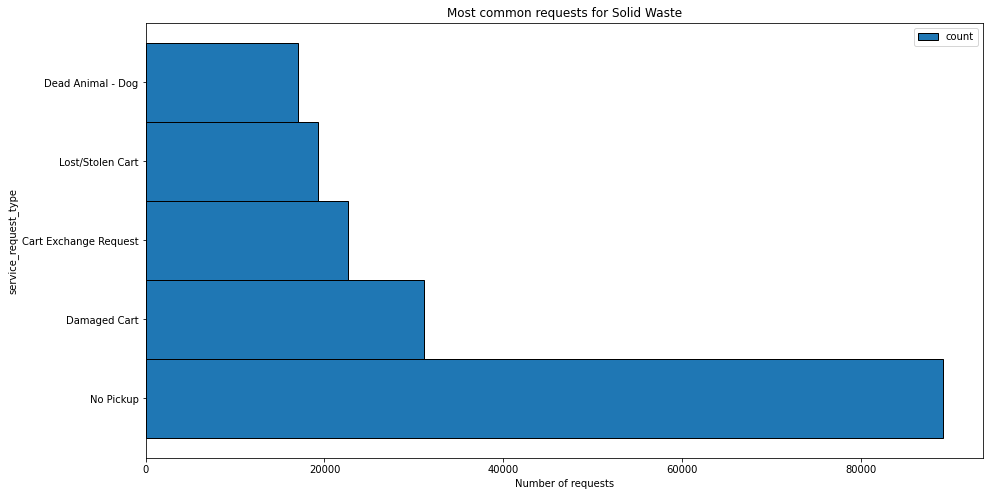

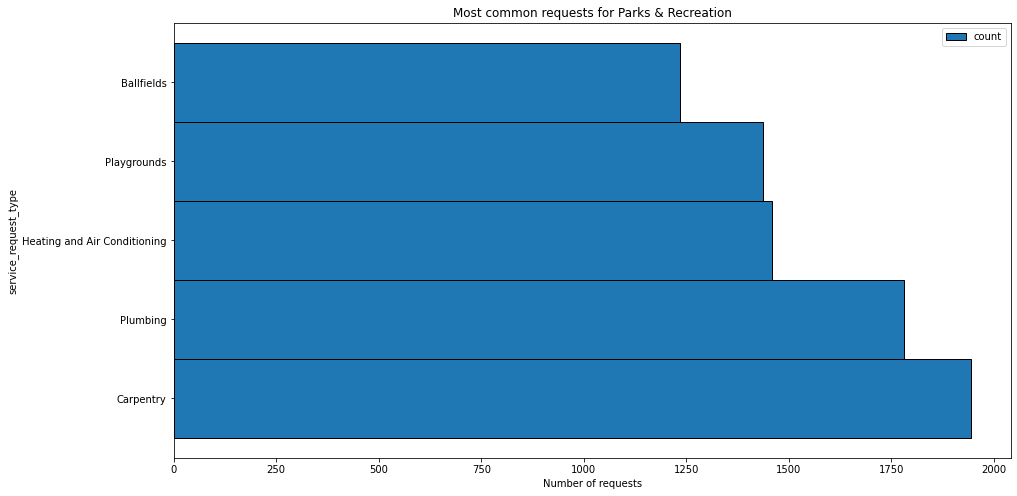

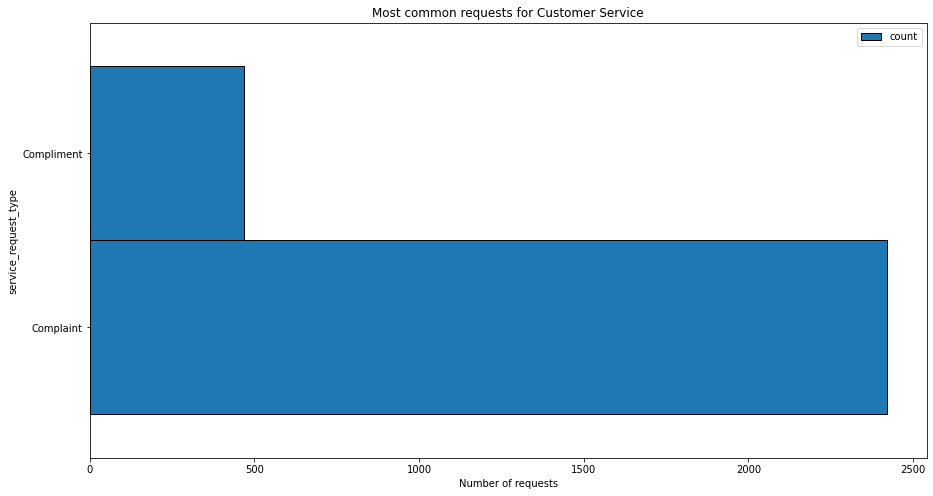

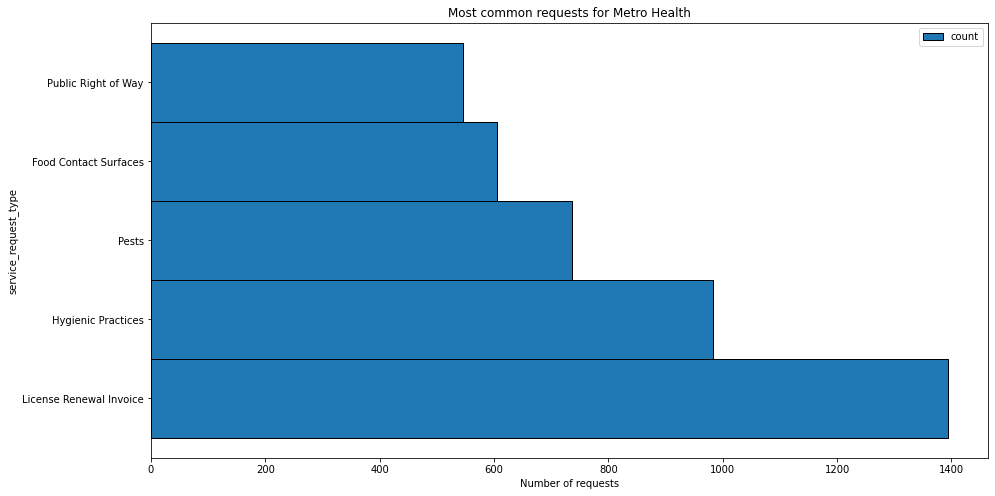

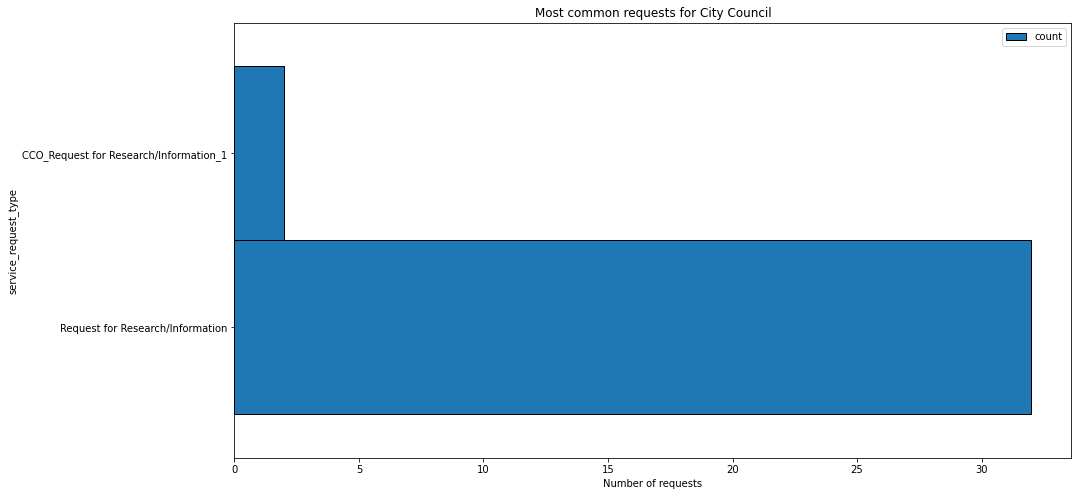

In [97]:
for i in range(department_list.shape[0]):

    (

        df.filter(df.department == department_list[i])
        .groupby("service_request_type")
        .count()
        .sort(col("count").desc())
        .toPandas()
        .head(5)
        .set_index("service_request_type")
        .plot.barh(width=1, edgecolor="black", figsize=(15, 8))
    )

    plt.title(f"Most common requests for {department_list[i]}")
    plt.xlabel("Number of requests")

## 6. Does whether or not its a weekend matter for when a case is opened/closed?

In [ ]:
(
    

)

## 7.On average, how many cases are opened a day for the Customer Service department?

## 8.Does the number of service requests for the solid waste department vary by day of the week?